# Analyzing NYC's 311 Street Flooding Complaints from 2010 to 2020
## *Data Inspection*

Mark Bauer

# Goal
In this notebook, we inspect and preview our data before we begin analysis. Specifically, I attempt to inspect the following items:

- the shape of the data
- number of null/na values in the dataset
- identify columns and data types
- descriptive or summary statistics
- correlation of columns

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## 311 Service Requests from 2010 to Present  
Website: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

311's data dictionary can be found in the data folder. 



![311](../images/nyc-311-screenshot.png)

Table of Contents
=================

   * [1. Importing Libraries](#1-Importing-Libraries)
       
       
   * [2. Loading Data](#2-Loading-Data)
       
       
   * [3. Data Inspection](#3-Data-Inspection)
       * [3.1 Basic Data Inspection](#31-Basic-Data-Inspection)
       * [3.2 Calculating Summary Statistics](#32-Calculating-Summary-Statistics)
       * [3.3 Identifying Null/NA Values](#33-Identifying-Null/NA-Values)
       * [3.4 Inspecting Items In Each Column](#34-Inspecting-Items-In-Each-Column)

# 1. Importing Libraries

In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Printing versions of Python modules and packages with **watermark** - the IPython magic extension.

In [108]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [109]:
%watermark -v -p numpy,pandas,seaborn

CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
seaborn 0.11.1


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Loading Data

In [110]:
# list items in data folder
%ls ../data-raw/

README.md                           raw_street_flooding_complaints.csv
data-dictionaries/                  raw_streets_clipped.json


In [111]:
# read data as a dataframe
flooding_311 = pd.read_csv('../data-raw/raw_street_flooding_complaints.csv', 
                           low_memory=False)

# previewing first five rows in data
flooding_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,location_type,due_date,landmark
0,35467474,2017-02-11T14:49:00.000,2017-02-17T11:19:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.00,152 BARCLAY AVENUE,BARCLAY AVENUE,...,Unspecified,STATEN ISLAND,40.54,-74.17,"{'latitude': '40.53905963837945', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,35473543,2017-02-12T19:03:00.000,2017-02-12T19:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11231.00,NaN,NaN,...,Unspecified,BROOKLYN,40.68,-73.99,"{'latitude': '40.67694549612395', 'longitude':...",3 STREET,BOND STREET,NaN,NaN,NaN
2,35475940,2017-02-12T14:38:00.000,2017-02-12T15:20:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10465.00,659 CLARENCE AVENUE,CLARENCE AVENUE,...,Unspecified,BRONX,40.83,-73.81,"{'latitude': '40.82869324687791', 'longitude':...",NaN,NaN,NaN,NaN,NaN
3,35478538,2017-02-13T13:11:00.000,2017-02-15T09:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11210.00,NaN,NaN,...,Unspecified,BROOKLYN,40.62,-73.94,"{'latitude': '40.61981574824473', 'longitude':...",EAST 32 STREET,AVENUE M,NaN,NaN,NaN
4,35479396,2017-02-13T07:26:00.000,2017-02-13T08:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10466.00,1635 EAST 233 STREET,EAST 233 STREET,...,Unspecified,BRONX,40.89,-73.83,"{'latitude': '40.88818786782963', 'longitude':...",NaN,NaN,NaN,NaN,NaN


In [112]:
# previewing the last five rows of our dataframe
flooding_311.tail()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,location_type,due_date,landmark
27423,35457500,2017-02-10T15:39:00.000,2017-02-13T08:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10037.00,458 MALCOLM X BOULEVARD,MALCOLM X BOULEVARD,...,Unspecified,MANHATTAN,40.81,-73.94,"{'latitude': '40.81266447489204', 'longitude':...",NaN,NaN,NaN,NaN,NaN
27424,35458891,2017-02-10T09:17:00.000,2017-02-11T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11427.00,88-23 MOLINE STREET,MOLINE STREET,...,Unspecified,QUEENS,40.73,-73.73,"{'latitude': '40.72996113065443', 'longitude':...",NaN,NaN,NaN,NaN,NaN
27425,35461648,2017-02-10T09:58:00.000,2017-02-10T14:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11360.00,NaN,NaN,...,Unspecified,QUEENS,40.79,-73.78,"{'latitude': '40.78883632109775', 'longitude':...",CROSS ISLAND PARKWAY,209 STREET,NaN,NaN,NaN
27426,35461654,2017-02-10T13:20:00.000,2017-02-12T10:55:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11210.00,NaN,NaN,...,Unspecified,BROOKLYN,40.62,-73.94,"{'latitude': '40.61971464149482', 'longitude':...",EAST 31 STREET,AVENUE M,NaN,NaN,NaN
27427,35461860,2017-02-10T16:55:00.000,2017-02-10T19:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11221.00,80 BLEECKER STREET,BLEECKER STREET,...,Unspecified,BROOKLYN,40.69,-73.92,"{'latitude': '40.69460646294161', 'longitude':...",NaN,NaN,NaN,NaN,NaN


In [113]:
print(flooding_311.shape)

(27428, 34)


# 3. Data Inspection

## 3.1 Basic Data Inspection

In [114]:
# the object's type
type(flooding_311)

pandas.core.frame.DataFrame

In [115]:
# printing the columns of our dataframe
flooding_311.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2', 'address_type',
       'city', 'facility_type', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'intersection_street_1',
       'intersection_street_2', 'location_type', 'due_date', 'landmark'],
      dtype='object')

In [116]:
# printing the data types of our columns
flooding_311.dtypes

unique_key                          int64
created_date                       object
closed_date                        object
agency                             object
agency_name                        object
complaint_type                     object
descriptor                         object
incident_zip                      float64
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
address_type                       object
city                               object
facility_type                     float64
status                             object
resolution_description             object
resolution_action_updated_date     object
community_board                    object
bbl                               float64
borough                            object
x_coordinate_state_plane          float64
y_coordinate_state_plane          float64
open_data_channel_type            

In [117]:
# printing the column names, non-null counts, and data types of our columns
flooding_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27428 entries, 0 to 27427
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      27428 non-null  int64  
 1   created_date                    27428 non-null  object 
 2   closed_date                     27426 non-null  object 
 3   agency                          27428 non-null  object 
 4   agency_name                     27428 non-null  object 
 5   complaint_type                  27428 non-null  object 
 6   descriptor                      27428 non-null  object 
 7   incident_zip                    26575 non-null  float64
 8   incident_address                17504 non-null  object 
 9   street_name                     17504 non-null  object 
 10  cross_street_1                  23722 non-null  object 
 11  cross_street_2                  23710 non-null  object 
 12  address_type                    

In [118]:
# counts of unique values of our datatypes 
flooding_311.dtypes.value_counts()

object     24
float64     9
int64       1
dtype: int64

In [119]:
# printing index type
flooding_311.index

RangeIndex(start=0, stop=27428, step=1)

In [120]:
cols = flooding_311.columns

print('Inspecting data for unique columns (True/False)\n' + \
     ('-' * 47))

for i in cols:
    print(str(i) + ':', flooding_311[i].is_unique)

Inspecting data for unique columns (True/False)
-----------------------------------------------
unique_key: True
created_date: False
closed_date: False
agency: False
agency_name: False
complaint_type: False
descriptor: False
incident_zip: False
incident_address: False
street_name: False
cross_street_1: False
cross_street_2: False
address_type: False
city: False
facility_type: False
status: False
resolution_description: False
resolution_action_updated_date: False
community_board: False
bbl: False
borough: False
x_coordinate_state_plane: False
y_coordinate_state_plane: False
open_data_channel_type: False
park_facility_name: False
park_borough: False
latitude: False
longitude: False
location: False
intersection_street_1: False
intersection_street_2: False
location_type: False
due_date: False
landmark: False


In [121]:
# printing True/False if column is unique on our unique key (DOITT_ID)
flooding_311['unique_key'].is_unique

True

In [122]:
# printing descriptive statistics of our numeric columns in our data
all_columns = flooding_311.columns
flooding_311[all_columns].astype(str).describe(include='all')[:2].T.sort_values(by='unique', 
                                                                                ascending=False)

,count,unique
unique_key,27428,27428
created_date,27428,25975
closed_date,27428,25023
resolution_action_updated_date,27428,25013
latitude,27428,16765
longitude,27428,16765
location,27428,16765
x_coordinate_state_plane,27428,15444
y_coordinate_state_plane,27428,15407
incident_address,27428,12218


In [123]:
flooding_311['descriptor'].value_counts()

Street Flooding (SJ)    27428
Name: descriptor, dtype: int64

In [124]:
flooding_311['agency'].value_counts()

DEP    27428
Name: agency, dtype: int64

In [125]:
flooding_311['agency_name'].value_counts()

Department of Environmental Protection    27428
Name: agency_name, dtype: int64

In [126]:
flooding_311['complaint_type'].value_counts()

Sewer    27428
Name: complaint_type, dtype: int64

In [127]:
flooding_311['status'].value_counts()

Closed      27421
Pending         4
Started         2
Assigned        1
Name: status, dtype: int64

In [128]:
flooding_311['resolution_description'].value_counts().reset_index().head()

,index,resolution_description
0,The Department of Environment Protection inspe...,11344
1,The Department of Environmental Protection has...,3952
2,The Department of Environmental Protection ins...,3465
3,The Department of Environmental Protection inv...,2881
4,The Department of Environmental Protection ins...,1249


In [129]:
print('Top 10 Resolution Descriptions in Descending Order:\n')

for i in range(10):
    print(str(i + 1) + '.', \
          flooding_311['resolution_description'].value_counts().index[i], \
          '\nCount: ' \
          f"{flooding_311['resolution_description'].value_counts()[i]:,}" + \
          '\n')

Top 10 Resolution Descriptions in Descending Order:

1. The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint. 
Count: 11,344

2. The Department of Environmental Protection has determined that this issue was previously reported by another customer The original complaint is being addressed. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint. 
Count: 3,952

3. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint. 
Count: 3,465

4. The Department of Environmental Protection inv

In [130]:
flooding_311.created_date.min()

'2010-01-02T08:26:00.000'

In [131]:
flooding_311.created_date.max()

'2020-12-31T15:41:00.000'

In [132]:
print('This dataset is from', \
      flooding_311.created_date.min()[0:10], \
      'to', \
      flooding_311.created_date.max()[0:10] + \
      '.')

This dataset is from 2010-01-02 to 2020-12-31.


## 3.2 Calcualting Summary Statistics

In [133]:
# display floats up to three decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [134]:
# printing descriptive statistics of our numeric columns in our data
flooding_311.describe()

,unique_key,incident_zip,facility_type,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location_type,landmark
count,27428.00,26575.00,0.00,15816.00,26491.00,26491.00,26491.00,26491.00,0.00,0.00
mean,32240462.88,10969.86,NaN,3700761123.31,1005575.87,186159.58,40.68,-73.92,NaN,NaN
std,9145119.01,536.76,NaN,1075451518.51,35049.08,30573.55,0.08,0.13,NaN,NaN
min,15639934.00,10001.00,NaN,0.00,913357.00,121032.00,40.50,-74.25,NaN,NaN
25%,24209554.00,10312.00,NaN,3060562512.50,986927.00,161238.00,40.61,-73.99,NaN,NaN
50%,32631370.50,11221.00,NaN,4069055005.00,1007562.00,183608.00,40.67,-73.92,NaN,NaN
75%,40019588.25,11385.00,NaN,4156502522.75,1034057.50,206502.00,40.73,-73.82,NaN,NaN
max,48543132.00,11697.00,NaN,5080500078.00,1067279.00,271876.00,40.91,-73.70,NaN,NaN


In [135]:
flooding_311.describe(include=['O']).T

,count,unique,top,freq
created_date,27428,25975,2011-08-28T00:00:00.000,13
closed_date,27426,25022,2017-05-06T08:30:00.000,36
agency,27428,1,DEP,27428
agency_name,27428,1,Department of Environmental Protection,27428
complaint_type,27428,1,Sewer,27428
descriptor,27428,1,Street Flooding (SJ),27428
incident_address,17504,12217,133-25 FRANCIS LEWIS BOULEVARD,58
street_name,17504,4080,BROADWAY,116
cross_street_1,23722,4588,BEND,330
cross_street_2,23710,4658,DEAD END,481


In [136]:
# printing descriptive statistics of our numeric columns in our data
flooding_311.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_key,27428.0,NaN,NaN,NaN,32240462.88,9145119.01,15639934.0,24209554.0,32631370.5,40019588.25,48543132.0
created_date,27428,25975,2011-08-28T00:00:00.000,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
closed_date,27426,25022,2017-05-06T08:30:00.000,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency,27428,1,DEP,27428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency_name,27428,1,Department of Environmental Protection,27428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
complaint_type,27428,1,Sewer,27428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptor,27428,1,Street Flooding (SJ),27428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_zip,26575.0,NaN,NaN,NaN,10969.86,536.76,10001.0,10312.0,11221.0,11385.0,11697.0
incident_address,17504,12217,133-25 FRANCIS LEWIS BOULEVARD,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,17504,4080,BROADWAY,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# returning the mode of our numeric columns (excluding our unique key = 'DOITT_ID') as 'mode'
mode = flooding_311.loc[:, flooding_311.columns != 'unique_key'].mode(numeric_only=False)

# renaming index to 'mode'
mode.rename(index={0: "mode"}, inplace=True)

# transposing and printing the mode ofour numeric columns (excluding our unique key = 'DOITT_ID')
mode.T

,mode
created_date,2011-08-28T00:00:00.000
closed_date,2017-05-06T08:30:00.000
agency,DEP
agency_name,Department of Environmental Protection
complaint_type,Sewer
descriptor,Street Flooding (SJ)
incident_zip,10306.0
incident_address,133-25 FRANCIS LEWIS BOULEVARD
street_name,BROADWAY
cross_street_1,BEND


In [138]:
# compute pairwise correlation of columns, excluding NA/null values
flooding_311.corr()

,unique_key,incident_zip,facility_type,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location_type,landmark
unique_key,1.00,0.04,NaN,-0.03,0.03,0.03,0.03,0.03,NaN,NaN
incident_zip,0.04,1.00,NaN,0.13,0.71,-0.10,-0.10,0.71,NaN,NaN
facility_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bbl,-0.03,0.13,NaN,1.00,-0.20,-0.58,-0.58,-0.20,NaN,NaN
x_coordinate_state_plane,0.03,0.71,NaN,-0.20,1.00,0.46,0.46,1.00,NaN,NaN
y_coordinate_state_plane,0.03,-0.10,NaN,-0.58,0.46,1.00,1.00,0.46,NaN,NaN
latitude,0.03,-0.10,NaN,-0.58,0.46,1.00,1.00,0.46,NaN,NaN
longitude,0.03,0.71,NaN,-0.20,1.00,0.46,0.46,1.00,NaN,NaN
location_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

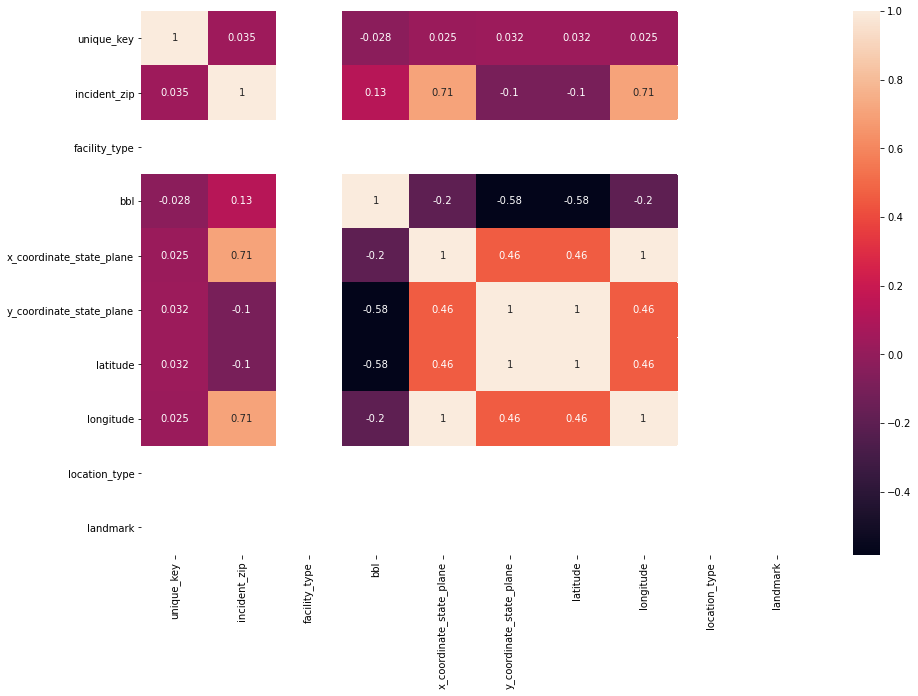

In [139]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(flooding_311.corr(), 
            annot=True, 
            ax=ax)

In [140]:
flooding_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27428 entries, 0 to 27427
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      27428 non-null  int64  
 1   created_date                    27428 non-null  object 
 2   closed_date                     27426 non-null  object 
 3   agency                          27428 non-null  object 
 4   agency_name                     27428 non-null  object 
 5   complaint_type                  27428 non-null  object 
 6   descriptor                      27428 non-null  object 
 7   incident_zip                    26575 non-null  float64
 8   incident_address                17504 non-null  object 
 9   street_name                     17504 non-null  object 
 10  cross_street_1                  23722 non-null  object 
 11  cross_street_2                  23710 non-null  object 
 12  address_type                    

In [141]:
flooding_311.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2', 'address_type',
       'city', 'facility_type', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'intersection_street_1',
       'intersection_street_2', 'location_type', 'due_date', 'landmark'],
      dtype='object')

In [142]:
heatmap = flooding_311[['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
                       'complaint_type', 'descriptor', 'incident_zip', 'incident_address',
                       'street_name', 'cross_street_1', 'cross_street_2', 'address_type',
                       'city', 'status', 'resolution_description',
                       'resolution_action_updated_date', 'community_board', 'borough',
                       'x_coordinate_state_plane', 'y_coordinate_state_plane',
                       'open_data_channel_type', 'park_facility_name', 'park_borough',
                       'latitude', 'longitude', 'location', 'intersection_street_1',
                       'intersection_street_2', 'bbl']]

<AxesSubplot:>

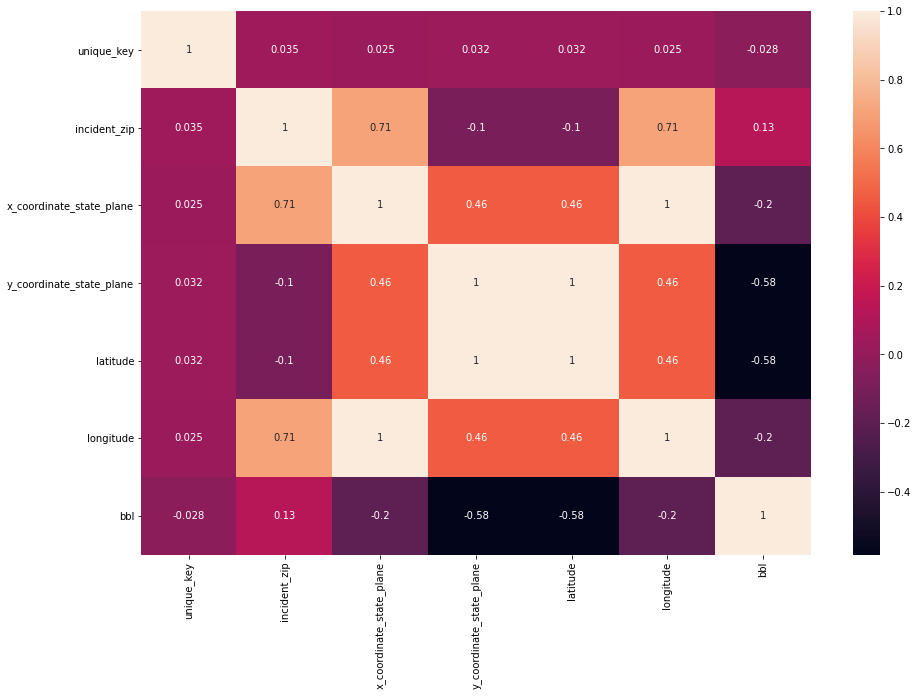

In [143]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(heatmap.corr(), 
            annot=True, 
            ax=ax)

## 3.3 Identifying Null/NA Values

In [144]:
print('Sum of nulls in column:')
flooding_311.isna().sum().sort_values(ascending=False)

Sum of nulls in column:


landmark                          27428
location_type                     27428
facility_type                     27428
due_date                          27427
intersection_street_2             17447
intersection_street_1             17447
bbl                               11612
street_name                        9924
incident_address                   9924
cross_street_2                     3718
cross_street_1                     3706
location                            937
longitude                           937
latitude                            937
x_coordinate_state_plane            937
y_coordinate_state_plane            937
incident_zip                        853
city                                852
resolution_description                7
address_type                          6
closed_date                           2
park_facility_name                    0
park_borough                          0
unique_key                            0
open_data_channel_type                0


In [145]:
print('Sum of nulls in all columns:')
flooding_311.isna().sum().sum()

Sum of nulls in all columns:


189894

In [146]:
print('Identifying nulls in column (True/False):')
flooding_311.isna().head()

Identifying nulls in column (True/False):


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,location_type,due_date,landmark
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True


In [147]:
print('Identifying any null values in column (True/False):')
flooding_311.isna().any().sort_values(ascending=False)

Identifying any null values in column (True/False):


landmark                           True
address_type                       True
x_coordinate_state_plane           True
bbl                                True
latitude                           True
longitude                          True
resolution_description             True
location                           True
facility_type                      True
city                               True
cross_street_2                     True
cross_street_1                     True
street_name                        True
incident_address                   True
incident_zip                       True
intersection_street_1              True
intersection_street_2              True
location_type                      True
due_date                           True
closed_date                        True
y_coordinate_state_plane           True
park_facility_name                False
park_borough                      False
unique_key                        False
open_data_channel_type            False


In [148]:
# return a boolean same-sized object indicating if any of the values are NA
flooding_311.isna().any().value_counts()

True     21
False    13
dtype: int64

In [149]:
# return descriptive statistics of boolean indicating if any of the values are NA
flooding_311.isna().any().describe()

count       34
unique       2
top       True
freq        21
dtype: object

In [150]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (flooding_311.isna().sum() / len(flooding_311)) * 100

# creating a dataframe
missing_data = pd.DataFrame({'Missing Ratio (%)' :missing_data}) 
missing_data.sort_values(by='Missing Ratio (%)', 
                         ascending=False, 
                         inplace=True)

missing_data.head(len(missing_data))

,Missing Ratio (%)
landmark,100.00
location_type,100.00
facility_type,100.00
due_date,100.00
intersection_street_2,63.61
intersection_street_1,63.61
bbl,42.34
street_name,36.18
incident_address,36.18
cross_street_2,13.56


## 3.4 Inspecting Items In Each Column

In [151]:
len(flooding_311.columns)

34

In [152]:
flooding_311.iloc[:,:15].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,facility_type
0,35467474,2017-02-11T14:49:00.000,2017-02-17T11:19:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.00,152 BARCLAY AVENUE,BARCLAY AVENUE,MOSELY AVE,SUMMIT PL,ADDRESS,STATEN ISLAND,NaN
1,35473543,2017-02-12T19:03:00.000,2017-02-12T19:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11231.00,NaN,NaN,NaN,NaN,INTERSECTION,BROOKLYN,NaN
2,35475940,2017-02-12T14:38:00.000,2017-02-12T15:20:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10465.00,659 CLARENCE AVENUE,CLARENCE AVENUE,SCHLEY AVE,RANDALL AVE,ADDRESS,BRONX,NaN
3,35478538,2017-02-13T13:11:00.000,2017-02-15T09:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11210.00,NaN,NaN,NaN,NaN,INTERSECTION,BROOKLYN,NaN
4,35479396,2017-02-13T07:26:00.000,2017-02-13T08:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10466.00,1635 EAST 233 STREET,EAST 233 STREET,PROVOST AVE,CLEMENTINE ST,ADDRESS,BRONX,NaN


In [153]:
flooding_311.iloc[:,15:30].head()

,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1
0,Closed,The Department of Environmental Protection has...,2017-02-17T11:19:00.000,03 STATEN ISLAND,5062420038.00,STATEN ISLAND,935649.00,135719.00,PHONE,Unspecified,STATEN ISLAND,40.54,-74.17,"{'latitude': '40.53905963837945', 'longitude':...",NaN
1,Closed,The Department of Environmental Protection has...,2017-02-12T19:03:00.000,06 BROOKLYN,NaN,BROOKLYN,986505.00,185906.00,ONLINE,Unspecified,BROOKLYN,40.68,-73.99,"{'latitude': '40.67694549612395', 'longitude':...",3 STREET
2,Closed,The Department of Environmental Protection res...,2017-02-12T15:20:00.000,10 BRONX,2054850051.00,BRONX,1035641.00,241247.00,ONLINE,Unspecified,BRONX,40.83,-73.81,"{'latitude': '40.82869324687791', 'longitude':...",NaN
3,Closed,The Department of Environmental Protection ins...,2017-02-15T09:30:00.000,18 BROOKLYN,NaN,BROOKLYN,999910.00,165097.00,PHONE,Unspecified,BROOKLYN,40.62,-73.94,"{'latitude': '40.61981574824473', 'longitude':...",EAST 32 STREET
4,Closed,The Department of Environment Protection inspe...,2017-02-13T08:10:00.000,12 BRONX,2049740028.00,BRONX,1032111.00,262916.00,PHONE,Unspecified,BRONX,40.89,-73.83,"{'latitude': '40.88818786782963', 'longitude':...",NaN


In [154]:
flooding_311.iloc[:,30:].head()

,intersection_street_2,location_type,due_date,landmark
0,NaN,NaN,NaN,NaN
1,BOND STREET,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,AVENUE M,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [155]:
print('Returning a dataframe containing counts and normalized counts of unique rows in each column (sorted desc).',
     '\n' + '-' * 60, '\n')

for col in flooding_311.columns:
    series_1 = flooding_311[col].value_counts().head()
    series_2 = flooding_311[col].value_counts(normalize=True).head()
    series_2 = series_2.rename(str(col) +  ' (normalized)')
    value_counts = pd.concat([series_1, series_2], axis=1)
    
    print(value_counts, '\n' \
         'Column Name:', col + ',', 'dtype:', flooding_311[col].dtype, '\n')    

Returning a dataframe containing counts and normalized counts of unique rows in each column (sorted desc). 
------------------------------------------------------------ 

          unique_key  unique_key (normalized)
16912386           1                     0.00
34671374           1                     0.00
18551703           1                     0.00
28195057           1                     0.00
21377939           1                     0.00 
Column Name: unique_key, dtype: int64 

                         created_date  created_date (normalized)
2011-08-28T00:00:00.000            13                       0.00
2019-10-27T13:22:00.000             7                       0.00
2011-08-29T00:00:00.000             6                       0.00
2017-05-05T13:49:00.000             6                       0.00
2018-11-26T18:33:00.000             5                       0.00 
Column Name: created_date, dtype: object 

                         closed_date  closed_date (normalized)
2017-05-06T08:3